#### Import Packages

In [1]:
import json
import urllib.request
import pandas as pd
from pandas.io.json import json_normalize

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches
from sklearn import preprocessing
import numpy as np

#### Read Data

In [4]:
company_df = pd.read_excel('company_for_priceindex.xls')

In [5]:
company_data_monthly = pd.read_csv('company_financial_data_35.csv')

#### Create the first one

##### Get the financial %change per company by day

In [28]:
financial_indicators = company_data_monthly.sort_values('yyyy-mm-dd')
for comp in company_data_monthly.columns.tolist()[1:]:
    financial_indicators[comp + '_change'] = (financial_indicators[comp] - financial_indicators[comp].shift(1))/financial_indicators[comp].shift(1)
financial_indicators

,yyyy-mm-dd,WMT,CLX,JNJ,PG,ROKU,CHTR,VZ,PTON,UBER,...,DAL_change,UAL_change,PLNT_change,EQX_change,CCL_change,HLT_change,MAR_change,EXPE_change,CVS_change,ANTM_change
99,2019-10-21,119.74,149.07,128.02,119.08,133.03,438.16,60.75,22.26,31.41,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,2019-10-22,119.58,148.44,129.20,122.18,129.06,437.23,60.77,21.16,32.53,...,0.001283,-0.011787,0.003319,-0.008197,-0.013219,-0.017967,-0.007724,0.002862,0.013090,0.028372
97,2019-10-23,119.35,149.81,129.90,123.00,128.76,435.56,60.88,21.08,33.05,...,-0.015371,0.002118,-0.005624,0.001653,0.034078,0.055549,0.011798,0.012148,-0.014423,0.012526
96,2019-10-24,119.10,150.76,127.50,124.79,131.22,435.07,60.58,21.34,33.28,...,-0.000372,-0.001001,0.016467,0.008251,-0.002273,0.011904,0.006559,-0.008459,-0.011585,-0.015256
95,2019-10-25,119.04,151.40,128.35,123.25,133.74,462.19,60.37,22.40,32.71,...,0.015059,0.020376,-0.001145,0.019640,0.015262,0.008049,0.015125,-0.000583,0.004010,0.013796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2020-03-09,117.16,174.90,136.44,116.06,96.26,463.21,55.83,23.21,28.17,...,-0.051645,-0.102111,-0.119658,-0.117714,-0.199263,-0.047208,-0.058467,-0.060425,-0.044427,-0.043836
3,2020-03-10,119.79,175.00,141.64,120.55,97.30,476.76,56.52,22.97,28.97,...,0.044807,0.123557,0.105560,-0.002591,0.104876,0.048039,0.055572,-0.004287,0.021207,0.060151
2,2020-03-11,114.43,169.40,131.80,111.59,90.63,450.65,54.83,22.00,26.24,...,-0.061579,-0.061263,-0.089893,-0.140260,-0.094505,-0.102192,-0.089744,-0.107762,-0.020607,-0.015242
1,2020-03-12,104.05,158.70,125.41,101.84,78.81,427.54,51.20,19.51,22.61,...,-0.209984,-0.248480,-0.152281,-0.114804,-0.311724,-0.053891,-0.063930,-0.151689,-0.109444,-0.090454


##### Calculate the %change by company / % change of DJI per day

In [31]:
financial_indicators_DJI = financial_indicators[['yyyy-mm-dd']]
for comp in [i for i in financial_indicators.columns if '_change' in i]:
    financial_indicators_DJI[comp] = financial_indicators[comp]/financial_indicators['DJI_change']

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


No handles with labels found to put in legend.


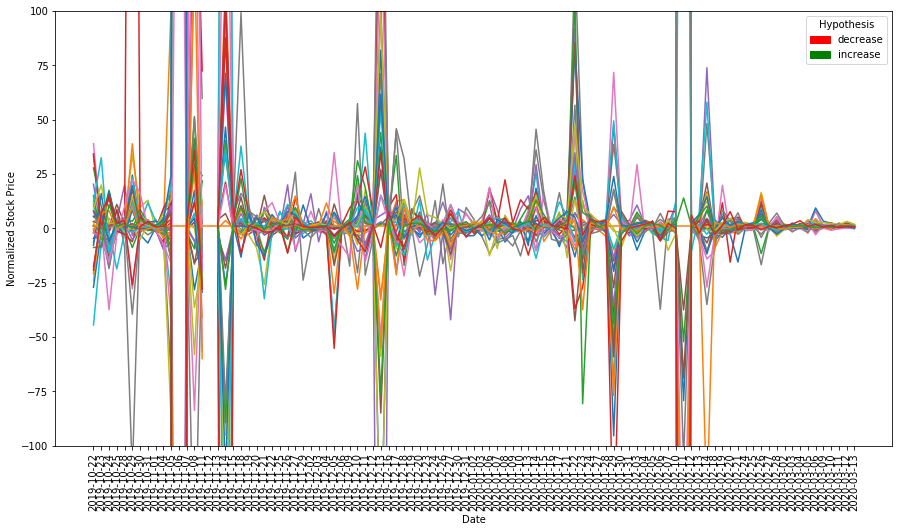

In [52]:
plt.figure(figsize=(15,8))
for c in [i for i in financial_indicators_DJI.columns if '_change' in i]:
    sns.lineplot(x='yyyy-mm-dd', y=c, data=financial_indicators_DJI.loc[:, ['yyyy-mm-dd'] + [c]], 
#                  label=company_df.loc[company_df.company_index==c,'company'].values[0],
#                 color = hypo_colors[company_df.loc[company_df.company_index==c,'hypothesis']].values
                )
#     plt.title(company_df.loc[company_df.company_index==c, label=].values)
    plt.ylabel('Normalized Stock Price')
    plt.xlabel('Date')

L = plt.legend(loc=9,ncol=2)
L.set_title('Hypothesis')
plt.xticks(rotation=90)
plt.ylim([-100,100])
red_patch = mpatches.Patch(color='red', label='decrease')
green_patch = mpatches.Patch(color='green', label='increase')
plt.legend(title='Hypothesis', handles=[red_patch, green_patch])
plt.show()

In [45]:
financial_indicators_DJI

,yyyy-mm-dd,WMT_change,CLX_change,JNJ_change,PG_change,ROKU_change,CHTR_change,VZ_change,PTON_change,UBER_change,...,DAL_change,UAL_change,PLNT_change,EQX_change,CCL_change,HLT_change,MAR_change,EXPE_change,CVS_change,ANTM_change
99,2019-10-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
98,2019-10-22,0.906600,2.867379,-6.253728,-17.662725,20.247702,1.440075,-0.223367,33.527591,-24.192732,...,-0.870160,7.997025,-2.251831,5.561283,8.968730,12.190400,5.240266,-1.941919,-8.881124,-19.249463
97,2019-10-23,-1.123765,5.392324,3.165497,3.921210,-1.358113,-2.231582,1.057572,-2.208924,9.339543,...,-8.980396,1.237426,-3.285618,0.965719,19.910162,32.455326,6.893362,7.097490,-8.426831,7.318688
96,2019-10-24,1.977788,-5.987491,17.444725,-13.740735,-18.039155,1.062209,4.652739,-11.645678,-6.570803,...,0.350937,0.945246,-15.548134,-7.790394,2.145899,-11.239252,-6.193202,7.987196,10.938853,14.404262
95,2019-10-25,-0.088533,0.746036,1.171587,-2.168736,3.374941,10.954593,-0.609194,8.729254,-3.009936,...,2.646362,3.580899,-0.201304,3.451483,2.682106,1.414463,2.657984,-0.102516,0.704687,2.424533
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2020-03-09,0.007669,-0.121576,0.505514,0.591209,0.725167,0.866491,0.234883,0.910085,1.423059,...,0.663333,1.311520,1.536892,1.511925,2.559343,0.606346,0.750956,0.776095,0.570623,0.563027
3,2020-03-10,0.458733,0.011684,0.778835,0.790583,0.220786,0.597785,0.252560,-0.211310,0.580346,...,0.915650,2.524942,2.157173,-0.052942,2.143182,0.981697,1.135628,-0.087614,0.433378,1.229216
2,2020-03-11,0.764152,0.546494,1.186437,1.269336,1.170708,0.935282,0.510646,0.721185,1.609348,...,1.051644,1.046252,1.535188,2.395349,1.613944,1.745233,1.532636,1.840356,0.351926,0.260304
1,2020-03-12,0.908154,0.632371,0.485386,0.874745,1.305712,0.513408,0.662812,1.133127,1.384984,...,2.102264,2.487673,1.524568,1.149364,3.120846,0.539531,0.640036,1.518645,1.095704,0.905586


In [65]:
USO_change = []
i = d[['yyyy-mm-dd', 'USO', 'DJI']].sort_values('yyyy-mm-dd')
for item in range(len(i)-1):
    USO_change.append((i.loc[item+1, 'USO'] - i.loc[item, 'USO'])/i.loc[item, 'USO'])

In [66]:
USO_change

[-0.060344827586206885,
 0.06116207951070342,
 0.04322766570605185,
 -0.09944751381215478,
 0.3389570552147241,
 0.10080183276059552,
 0.026014568158168577,
 0.0030425963488844967,
 0.003033367037411462,
 -0.04737903225806458,
 0.03492063492063493,
 0.04192229038854808,
 0.020608439646712547,
 0.03269230769230768,
 0.03910614525139664,
 0.01075268817204294,
 -0.008865248226950324,
 -0.020572450805008982,
 0.0,
 -0.01004566210045657,
 -0.0027675276752766936,
 -0.028677150786309016,
 -0.007619047619047626,
 0.015355086372360858,
 0.01512287334593574,
 -0.0037243947858473857,
 -0.02429906542056073,
 0.004789272030651409,
 0.033365109628217315,
 0.02214022140221404,
 0.007220216606498201,
 0.008064516129032246,
 -0.013333333333333365,
 0.02972972972972974,
 0.020122484689413862,
 0.020583190394511168,
 0.02857142857142856,
 0.007352941176470577,
 -0.0032441200324412754,
 -0.00895036615134251,
 0.008210180623973698,
 -0.006514657980456032,
 0.01721311475409843,
 0.0064464141821112065,
 0.01

In [67]:
DJI_change = []
i = d[['yyyy-mm-dd', 'USO', 'DJI']].sort_values('yyyy-mm-dd')
for item in range(len(i)-1):
    DJI_change.append((i.loc[item+1, 'DJI'] - i.loc[item, 'DJI'])/i.loc[item, 'DJI'])

##### % change by DJI and USO

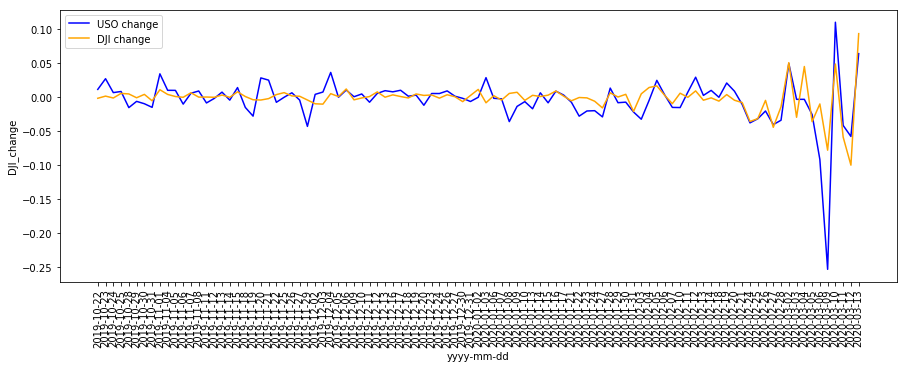

In [11]:
plt.figure(figsize=(15, 5))
sns.lineplot(data=financial_indicators, x='yyyy-mm-dd', y='USO_change', color='blue', label='USO change')
sns.lineplot(data=financial_indicators, x='yyyy-mm-dd', y='DJI_change', color='orange', label='DJI change')
plt.legend()
plt.xticks(rotation=90)
plt.show()

In [54]:
d = pd.read_csv('company_financial_data_35.csv', index_col=False)

In [55]:
d

,yyyy-mm-dd,WMT,CLX,JNJ,PG,ROKU,CHTR,VZ,PTON,UBER,...,DAL,UAL,PLNT,EQX,CCL,HLT,MAR,EXPE,CVS,ANTM
0,2020-03-13,114.10,167.77,134.29,114.07,80.95,454.19,54.17,19.72,22.60,...,38.36,41.64,53.98,5.75,17.58,78.63,95.61,69.63,59.64,270.34
1,2020-03-12,104.05,158.70,125.41,101.84,78.81,427.54,51.20,19.51,22.61,...,33.71,37.08,48.32,5.86,14.97,76.72,93.71,65.04,54.60,256.21
2,2020-03-11,114.43,169.40,131.80,111.59,90.63,450.65,54.83,22.00,26.24,...,42.67,49.34,57.00,6.62,21.75,81.09,100.11,76.67,61.31,281.69
3,2020-03-10,119.79,175.00,141.64,120.55,97.30,476.76,56.52,22.97,28.97,...,45.47,52.56,62.63,7.70,24.02,90.32,109.98,85.93,62.60,286.05
4,2020-03-09,117.16,174.90,136.44,116.06,96.26,463.21,55.83,23.21,28.17,...,43.52,46.78,56.65,7.72,21.74,86.18,104.19,86.30,61.30,269.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2019-10-25,119.04,151.40,128.35,123.25,133.74,462.19,60.37,22.40,32.71,...,54.60,91.64,61.04,6.23,44.57,97.69,126.18,137.06,65.10,263.07
96,2019-10-24,119.10,150.76,127.50,124.79,131.22,435.07,60.58,21.34,33.28,...,53.79,89.81,61.11,6.11,43.90,96.91,124.30,137.14,64.84,259.49
97,2019-10-23,119.35,149.81,129.90,123.00,128.76,435.56,60.88,21.08,33.05,...,53.81,89.90,60.12,6.06,44.00,95.77,123.49,138.31,65.60,263.51
98,2019-10-22,119.58,148.44,129.20,122.18,129.06,437.23,60.77,21.16,32.53,...,54.65,89.71,60.46,6.05,42.55,90.73,122.05,136.65,66.56,260.25


In [45]:
company_data = pd.read_csv('company_financial_data_35.csv', index_col=False)

In [99]:
def normalize(x_pre, x):
    min_val = min(x_pre)
    max_val = max(x_pre)
    
    r = max_val - min_val    
    x_transformed = [(i - min_val)/r for i in x]
    return x_transformed

In [100]:
comp_notnull = company_data.loc[:, company_data.isnull().sum() < company_data.shape[0]].columns[1:]


company_data_daily_normalized = pd.DataFrame()
company_data_daily_normalized['yyyy-mm-dd'] = company_data['yyyy-mm-dd']
for company in comp_notnull:
    x = list(company_data[company].values)
    x_pre = np.array(company_data.loc[company_data['yyyy-mm-dd'] < '2020-02-01', company].values)

    company_data_daily_normalized[company] = normalize(x_pre, x)


In [101]:
company_data_daily_normalized

,yyyy-mm-dd,WMT,CLX,JNJ,PG,ROKU,CHTR,VZ,PTON,UBER,...,DAL,UAL,PLNT,EQX,CCL,HLT,MAR,EXPE,CVS,ANTM
0,2020-03-13,-0.039074,1.522758,0.294705,-0.643142,-0.818638,0.232067,-1.453416,-0.086294,-0.291990,...,-1.872573,-1.745263,-0.279851,-0.026756,-2.670588,-0.521777,-0.850708,-0.560909,-0.442930,0.315895
1,2020-03-12,-1.493488,0.915663,-0.090712,-2.271638,-0.865343,-0.091395,-2.375776,-0.099619,-0.291128,...,-2.436893,-1.985263,-0.543843,0.010033,-2.949733,-0.604140,-0.911840,-0.665227,-0.872232,0.057436
2,2020-03-11,0.008683,1.631861,0.186632,-0.973369,-0.607377,0.189101,-1.248447,0.058376,0.021533,...,-1.349515,-1.340000,-0.138993,0.264214,-2.224599,-0.415696,-0.705920,-0.400909,-0.300681,0.523505
3,2020-03-10,0.784370,2.006693,0.613715,0.219707,-0.461807,0.506008,-0.723602,0.119924,0.256675,...,-1.009709,-1.170526,0.123601,0.625418,-1.981818,-0.017680,-0.388353,-0.190455,-0.190801,0.603256
4,2020-03-09,0.403763,2.000000,0.388021,-0.378162,-0.484505,0.341546,-0.937888,0.135152,0.187769,...,-1.246359,-1.474737,-0.155317,0.632107,-2.225668,-0.196205,-0.574646,-0.182045,-0.301533,0.306384
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2019-10-25,0.675832,0.427041,0.036892,0.579228,0.333479,0.329166,0.472050,0.083756,0.578811,...,0.098301,0.886316,0.049440,0.133779,0.216043,0.300129,0.132883,0.971591,0.022147,0.182916
96,2019-10-24,0.684515,0.384203,0.000000,0.784288,0.278481,0.000000,0.537267,0.016497,0.627907,...,0.000000,0.790000,0.052705,0.093645,0.144385,0.266494,0.072394,0.973409,0.000000,0.117432
97,2019-10-23,0.720695,0.320616,0.104167,0.545939,0.224793,0.005947,0.630435,0.000000,0.608096,...,0.002427,0.794737,0.006530,0.076923,0.155080,0.217335,0.046332,1.000000,0.064736,0.190964
98,2019-10-22,0.753980,0.228916,0.073785,0.436751,0.231340,0.026217,0.596273,0.005076,0.563307,...,0.104369,0.784737,0.022388,0.073579,0.000000,0.000000,0.000000,0.962273,0.146508,0.131333


In [47]:
comp_notnull = company_data.loc[:, company_data.isnull().sum() < company_data.shape[0]].columns[1:]


company_data['yyyy-mm-dd'] = pd.to_datetime(company_data['yyyy-mm-dd'])
for c in comp_notnull:
    company_data[c] = company_data[c].astype(float)

In [129]:
company_data_daily_normalized.loc[company_data_daily_normalized['yyyy-mm-dd'] == '2020-03-012'].values

array([[Timestamp('2020-03-12 00:00:00'), -1.4934876989869772,
        0.9156626506024084, -0.09071180555555573, -2.27163781624501,
        -0.8653426451331293, -0.09139458672168915, -2.375776397515528,
        -0.09961928934010128, -0.2911283376399654, -2.002355712603064,
        -0.48734177215189883, 1.0040080160320641, 0.561582051578582,
        0.09224237746043999, -0.21203605707820933, 0.4749262536873154,
        3.1773761713520754, 0.07388080197747866, -0.5248744865358291,
        -1.7258687258687249, -1.8376068376068377, -2.1826095703125006,
        -1.6419031719532544, -0.6733284883720928, -2.4368932038834945,
        -1.9852631578947368, -0.5438432835820892, 0.010033444816053593,
        -2.949732620320855, -0.6041397153945669, -0.911840411840412,
        -0.6652272727272727, -0.8722316865417382, 0.057435522224254354]],
      dtype=object)

In [36]:
hypo_colors = {'increase':'green', 'decrease':'red'}

No handles with labels found to put in legend.


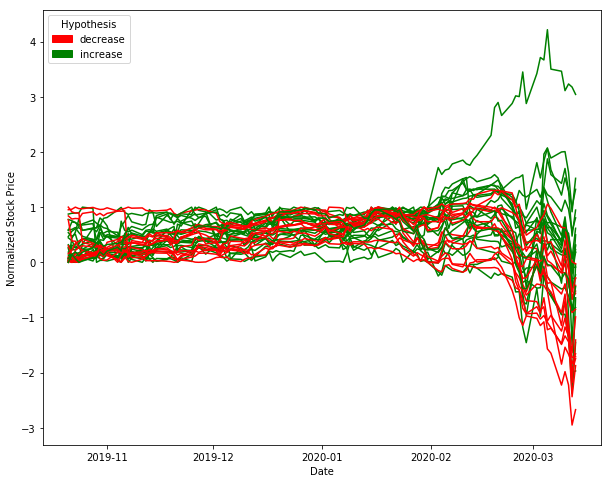

In [146]:
plt.figure(figsize=(15,8))
for c in comp_notnull:
    sns.lineplot(x='yyyy-mm-dd', y=c, data=company_data_daily_normalized.loc[:, ['yyyy-mm-dd'] + [c]], 
#                  label=company_df.loc[company_df.company_index==c,'company'].values[0],
                color = hypo_colors[company_df.loc[company_df.company_index==c,'hypothesis'].values[0]])
#     plt.title(company_df.loc[company_df.company_index==c, label=].values)
    plt.ylabel('Normalized Stock Price')
    plt.xlabel('Date')

L = plt.legend(loc=9,ncol=2)
L.set_title('Hypothesis')

plt.title('Normalized Stock Prices Over Time')
red_patch = mpatches.Patch(color='red', label='decrease')
green_patch = mpatches.Patch(color='green', label='increase')
plt.legend(title='Hypothesis', handles=[red_patch, green_patch])
plt.show()

min: Carnival Cruise <br>
max: Zoom

##### Interactive

In [150]:
import plotly.graph_objects as go
import plotly.express as px

In [185]:
company_data_daily_normalized_stacked = pd.DataFrame(columns=['yyyy-mm-dd','normalized_stock_price', 'company_index'])
for c in comp_notnull:
    d = company_data_daily_normalized.loc[:,['yyyy-mm-dd']+[c]]
    d.columns = ['yyyy-mm-dd','normalized_stock_price']
    d['company_index'] = c
    company_data_daily_normalized_stacked = company_data_daily_normalized_stacked.append(d)
company_data_daily_normalized_stacked = company_data_daily_normalized_stacked.merge(company_df, 
                                                                                    on='company_index', 
                                                                                    how='left')

In [192]:
company_data_daily_normalized_stacked.head()

,yyyy-mm-dd,normalized_stock_price,company_index,company,hypothesis,group
0,2020-03-13,-0.039074,WMT,Walmart,increase,cleaning
1,2020-03-12,-1.493488,WMT,Walmart,increase,cleaning
2,2020-03-11,0.008683,WMT,Walmart,increase,cleaning
3,2020-03-10,0.784370,WMT,Walmart,increase,cleaning
4,2020-03-09,0.403763,WMT,Walmart,increase,cleaning


In [212]:
fig = go.Figure()

for c in company_data_daily_normalized_stacked.company_index.unique():
    df = company_data_daily_normalized_stacked.loc[company_data_daily_normalized_stacked.company_index==c]
    x = df["yyyy-mm-dd"]
    y= df['normalized_stock_price']
    
    fig.add_trace(go.Scatter(
    x=x,
    y=y,
#     fill='toself',
#     fillcolor='rgba(0,100,80,0.2)',
#     line_color='rgba(255,255,255,0)',
#     showlegend=False,
    name=company_df.loc[company_df.company_index==c,'company'].values[0]
    ))
fig.show()

In [214]:
fig = px.line(company_data_daily_normalized_stacked, x="yyyy-mm-dd", y='normalized_stock_price', 
              line_group='company_index', color='group',
              hover_name="company")
fig.show()

In [200]:
fig = px.line(company_data_daily_normalized_stacked, x="yyyy-mm-dd", y='normalized_stock_price', 
              line_group='company_index', color='hypothesis',
              hover_name="company")
fig.show()

In [216]:
fig = px.line(company_data_daily_normalized_stacked, x="yyyy-mm-dd", 
              y='normalized_stock_price', line_group='company_index')
fig.data[10].visible = True
# Create and add slider
steps = []
for i in range(len(fig.data)):
    step = dict(
        method="restyle",
        args=["visible", [False] * len(fig.data)],
    )
    step["args"][1][i] = True  # Toggle i'th trace to "visible"
    steps.append(step)

sliders = [dict(
    active=10,
    currentvalue={"prefix": "Frequency: "},
    pad={"t": 50},
    steps=steps
)]

fig.update_layout(
    sliders=sliders
)

fig.show()

In [172]:
fig = px.line(company_data_daily_normalized_stacked, x="yyyy-mm-dd", 
              y='normalized_stock_price', line_group='company_index')
fig.show()

In [ ]:
plt.figure(figsize=(10,8))
for c in comp_notnull:
    sns.lineplot(x='yyyy-mm-dd', y=c, data=company_data_daily_normalized.loc[:, ['yyyy-mm-dd'] + [c]], 
#                  label=company_df.loc[company_df.company_index==c,'company'].values[0],
                color = hypo_colors[company_df.loc[company_df.company_index==c,'hypothesis'].values[0]])
#     plt.title(company_df.loc[company_df.company_index==c, label=].values)
    plt.ylabel('Normalized Stock Price')
    plt.xlabel('Date')

L = plt.legend(loc=9,ncol=2)
L.set_title('Hypothesis')

red_patch = mpatches.Patch(color='red', label='decrease')
green_patch = mpatches.Patch(color='green', label='increase')
plt.legend(title='Hypothesis', handles=[red_patch, green_patch])
plt.show()

/Applications/anaconda3/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


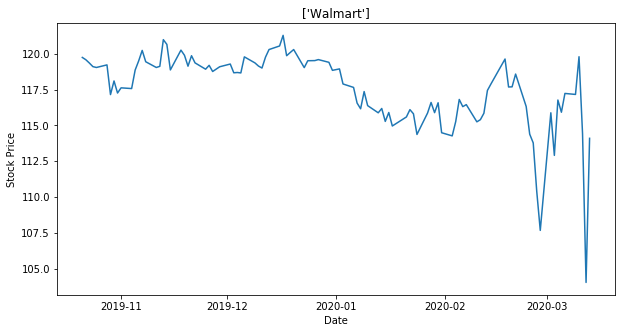

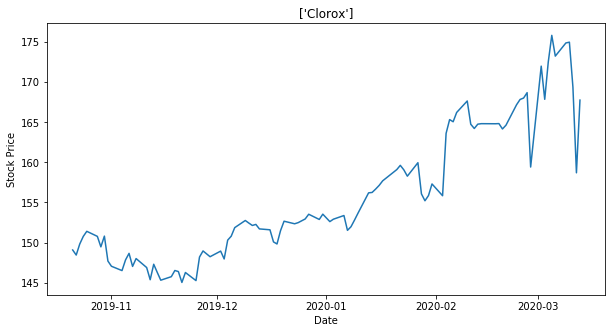

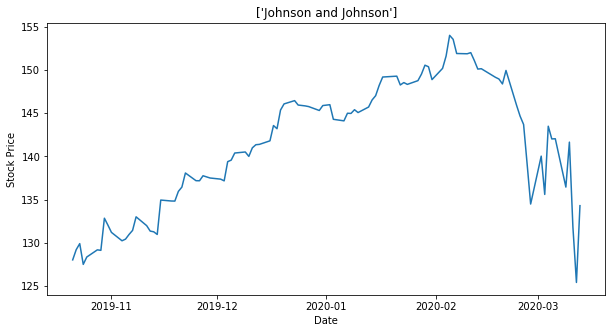

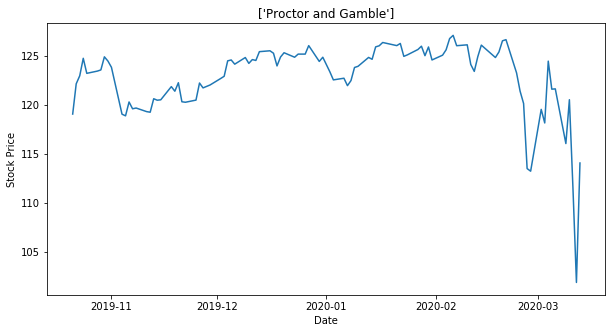

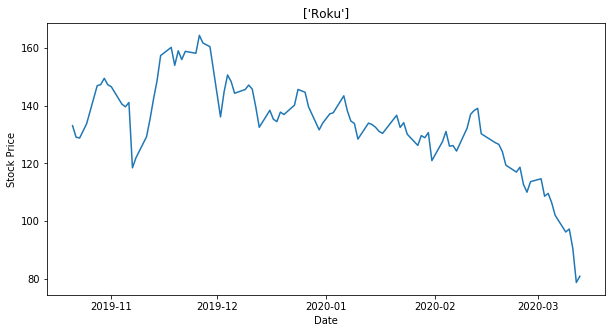

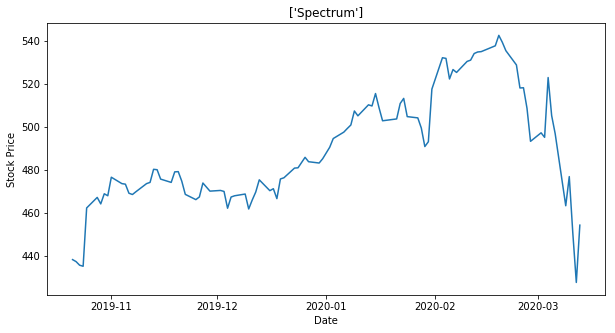

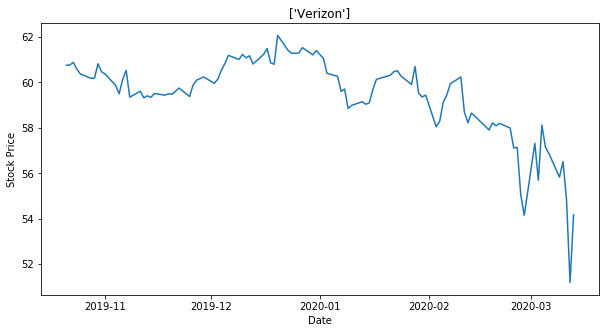

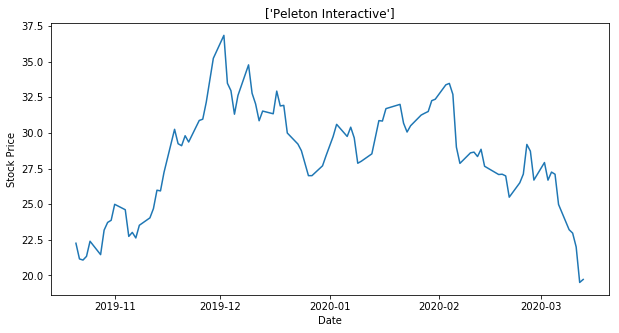

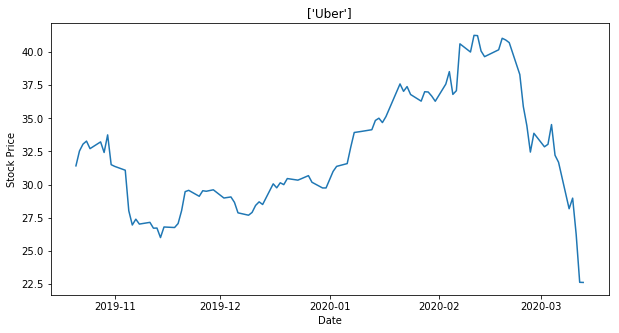

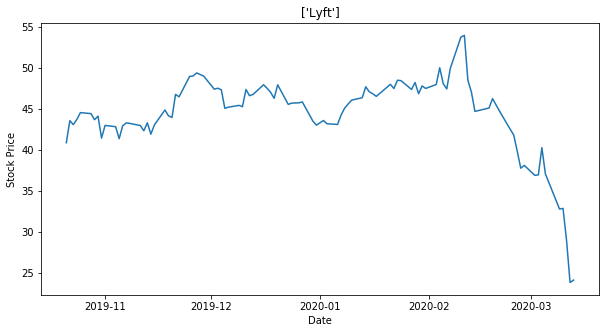

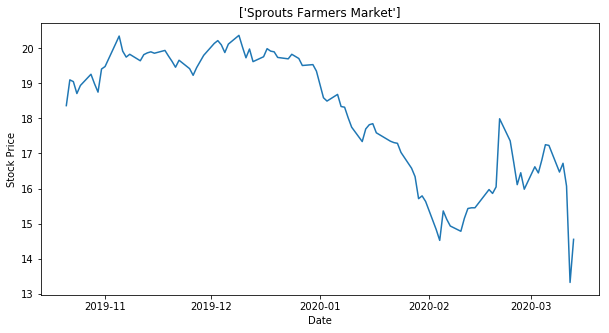

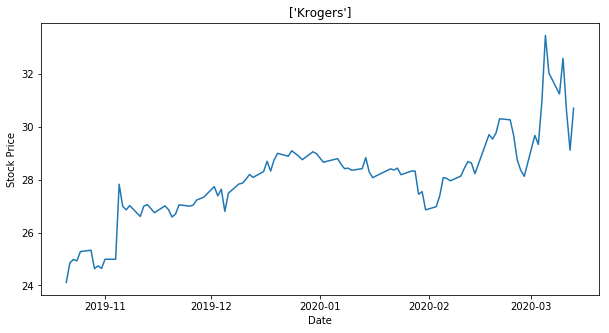

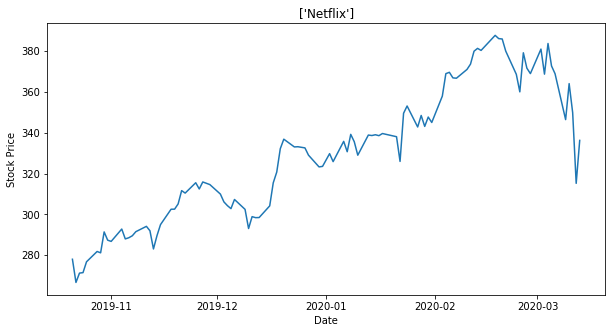

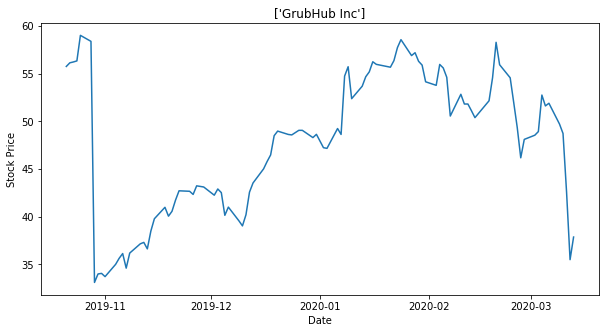

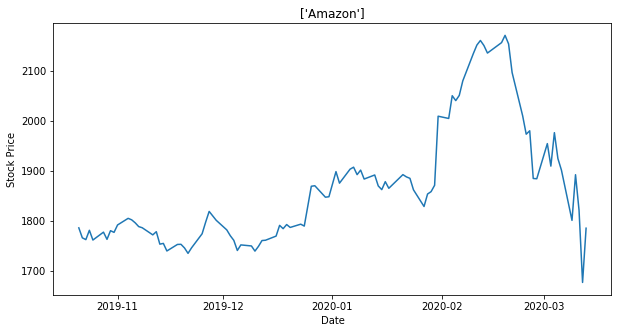

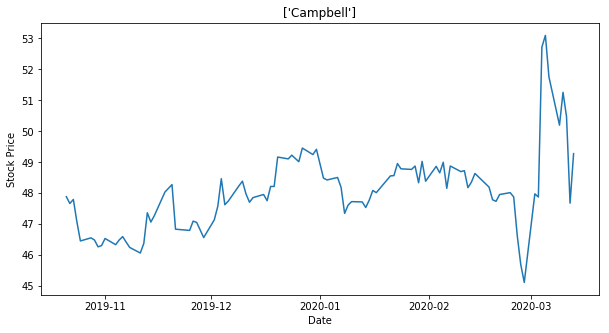

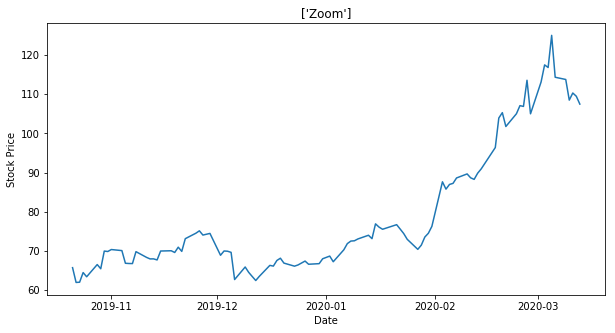

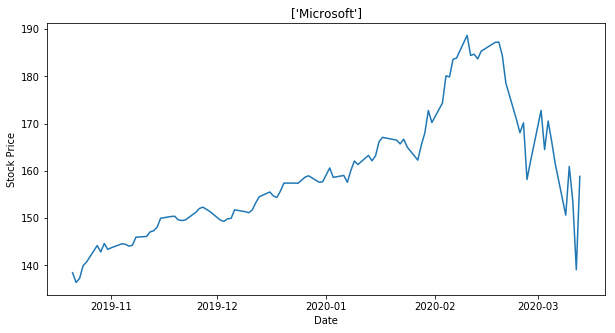

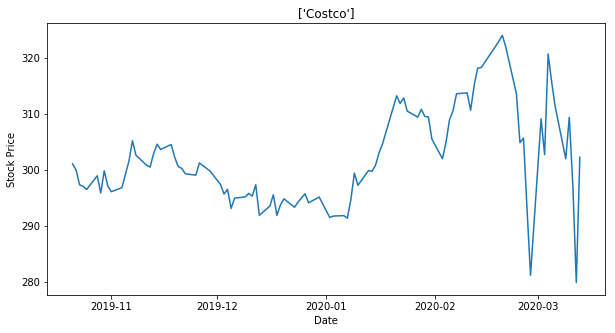

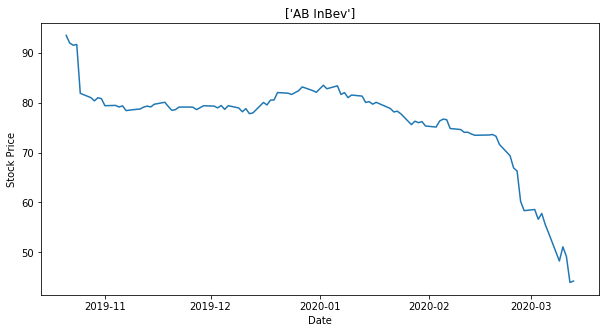

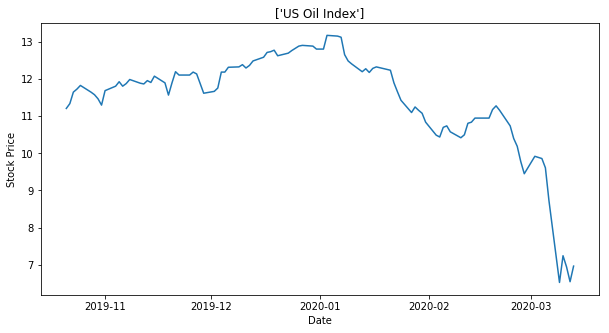

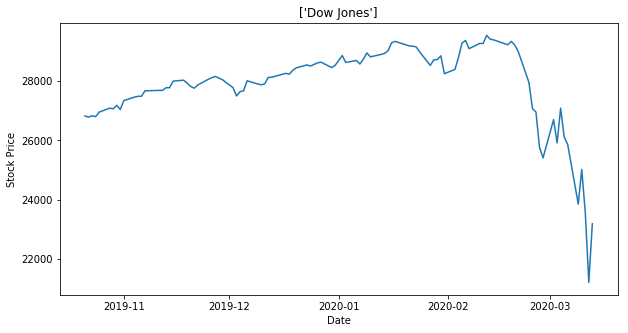

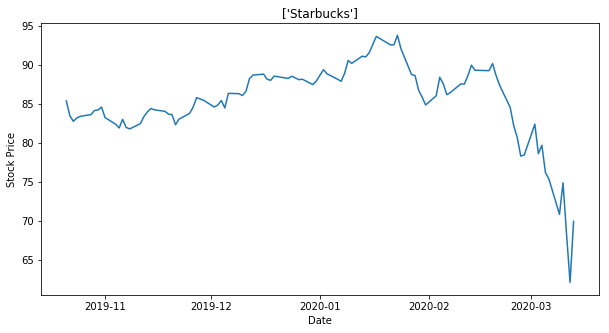

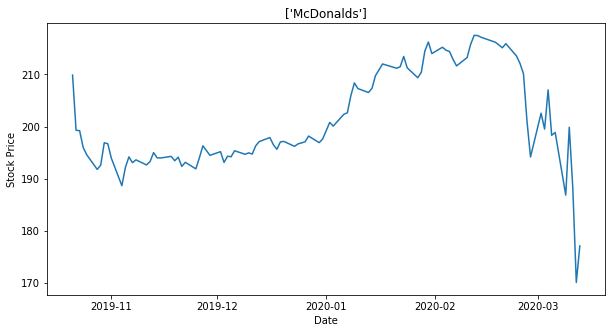

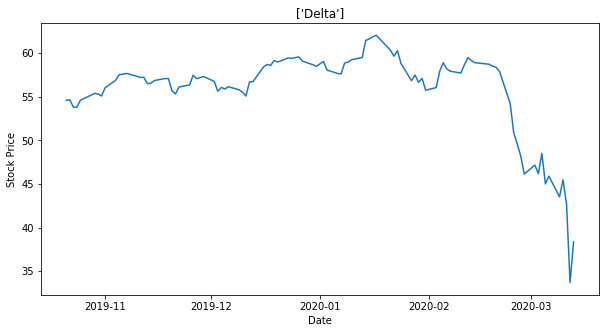

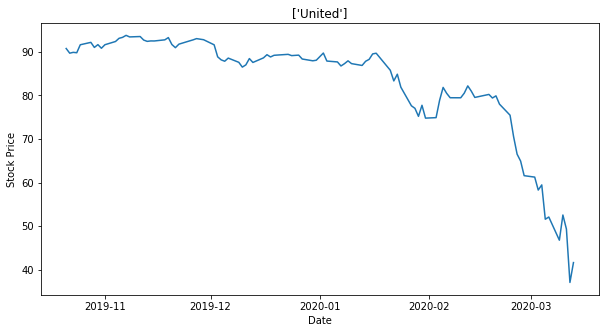

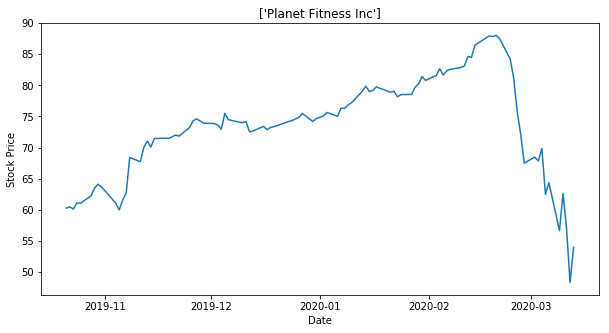

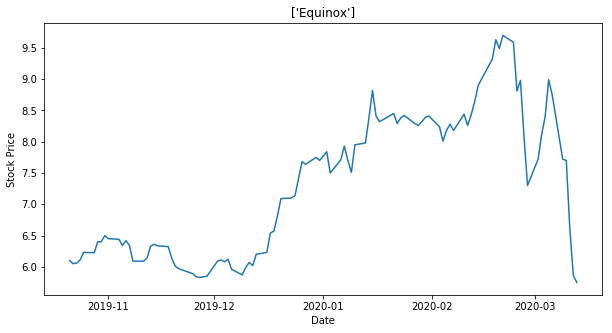

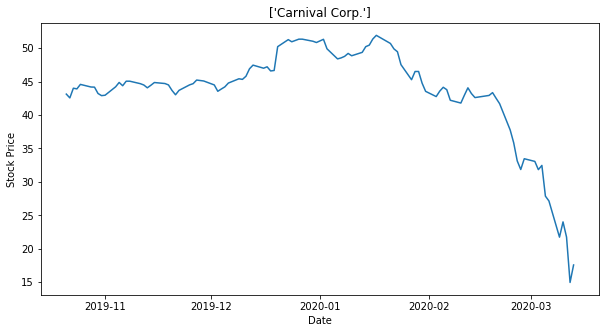

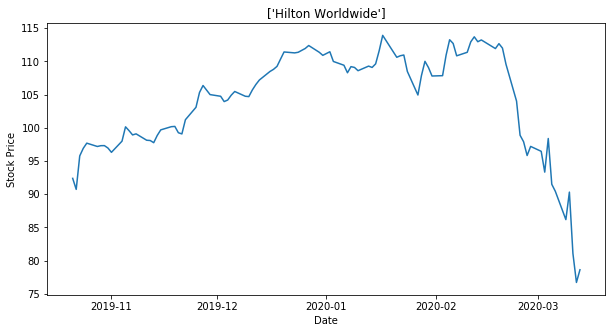

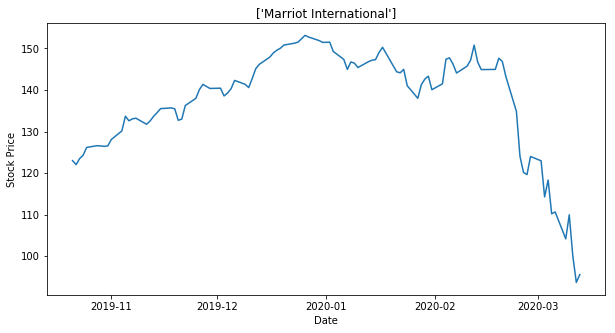

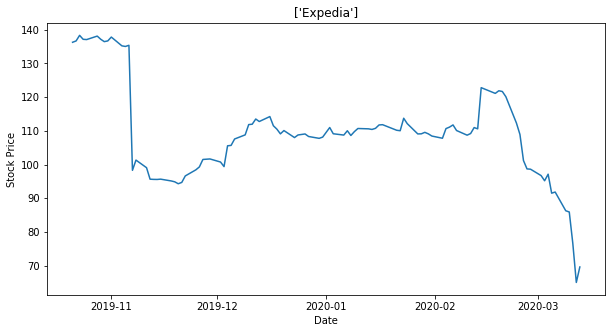

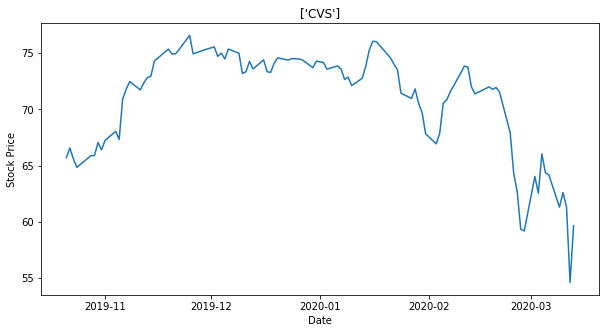

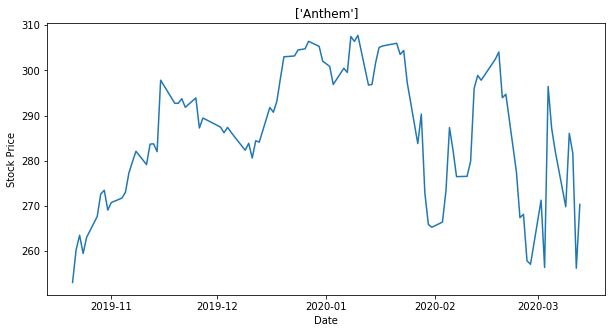

In [48]:
for c in comp_notnull:
    plt.figure(figsize=(10,5))
    sns.lineplot(x='yyyy-mm-dd', y=c, data=company_data.loc[:, ['yyyy-mm-dd'] + [c]])
    plt.title(company_df.loc[company_df.company_index==c, 'company'].values)
    plt.ylabel('Stock Price')
    plt.xlabel('Date')
    plt.show()